In [42]:
import pandas as pd

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
# %reload_kedro
# df = catalog.load("preprocessed_udacity")
# df.head()

In [44]:
df = pd.read_csv('output_cleaned.csv')

In [45]:
del df['Unnamed: 0']

In [46]:
df

,collaboration,description,difficulty,duration,free,id_course,n_reviews,rating,school,skills,title,url,time_range
0,Insight,"Learn to design data models, build data wareho...",intermediate,200.0,0,nd027,918,91.089325,School of Data Science,"Data Modeling, Data Pipelines, Data Lakes, Spa...",Become a Data Engineer,https://www.udacity.com/course/data-engineer-n...,months
1,"Google, Hootsuite, HubSpot, MailChimp, Moz, Fa...","Learn to create marketing content, use social ...",beginner,120.0,0,nd018,1753,93.964632,School of Business,"Digital Marketing, Social Media Marketing, Fac...",Become a Digital Marketer,https://www.udacity.com/course/digital-marketi...,months
2,None,You’ll learn how to create a digital user expe...,beginner,120.0,0,nd578,619,94.248788,School of Business,"User Research, User Experience, Prototyping, I...",Become a UX Designer,https://www.udacity.com/course/ux-designer-nan...,months
3,"AWS, Facebook Artificial Intelligence","Become an expert in neural networks, and learn...",intermediate,160.0,0,nd101,2893,93.218113,School of Artificial Intelligence,"Deep Learning, Neural Networks, Jupyter Notebo...",Deep Learning,https://www.udacity.com/course/deep-learning-n...,months
4,None,The goal of the Full Stack Web Developer Nanod...,intermediate,160.0,0,nd0044,517,90.870406,School of Programming & Development,"Python, JavaScript, PostgreSQL, Flask, Docker,...",Full Stack Web Developer,https://www.udacity.com/course/full-stack-web-...,months
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,"Kaggle, AWS",Learn foundational machine learning algorithms...,intermediate,120.0,0,nd229,342,94.853801,School of Artificial Intelligence,"Introduction to Machine Learning, Supervised L...",Intro to Machine Learning with PyTorch,https://www.udacity.com/course/intro-to-machin...,months
246,None,Build sustainable profit streams from products...,intermediate,40.0,0,nd037-3,0,NaN,School of Business,"Product Management, Monetization Models, Prici...",Monetization Strategy Course,https://www.udacity.com/course/monetization-st...,month
247,WorldQuant,"Learn the basics of quantitative analysis, inc...",intermediate,240.0,0,nd880,515,91.611650,School of Artificial Intelligence,"Momentum Trading Strategy, Smart Beta, Alpha F...",Artificial Intelligence for Trading,https://www.udacity.com/course/ai-for-trading-...,months
248,None,Learn the essential foundations of AI: the pro...,beginner,120.0,0,nd089,839,92.467223,School of Artificial Intelligence,"Python, NumPy, Pandas, Matplotlib, PyTorch",AI Programming with Python,https://www.udacity.com/course/ai-programming-...,months


# Feature Scaling

Indeed many estimators are designed with the assumption that each feature takes values close to zero or more importantly that all features vary on comparable scales. In particular, metric-based and gradient-based estimators often assume approximately standardized data (centered features with unit variances). A notable exception are decision tree-based estimators that are robust to arbitrary scaling of the data.

## Normalization - Standardization (Z-score scaling)

cannot guarantee balanced feature scales in the presence of outliers.
removes the mean and scales the data to unit variance
z = (X - X.mean) / std

In [47]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler().fit(df[['duration']])
df['duration'] = ss.transform(df[['duration']])

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Min-Max scaling
transforms features by scaling each feature to a given range. Default to [0,1].
X_scaled = (X - X.min / (X.max - X.min)

In [48]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler().fit(df[['rating']])
df['rating'] = mms.transform(df[['rating']])

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## RobustScaler
removes the median and scales the data according to the quantile range (defaults to IQR)
X_scaled = (X - X.median) / IQR

NO SIRVE

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html

Unlike the previous scalers, the centering and scaling statistics of RobustScaler is based on percentiles and are therefore not influenced by a few number of very large marginal outliers. Consequently, the resulting range of the transformed feature values is larger than for the previous scalers and, more importantly, are approximately similar: for both features most of the transformed values lie in a [-2, 3] range as seen in the zoomed-in figure. Note that the outliers themselves are still present in the transformed data. If a separate outlier clipping is desirable, a non-linear transformation is required (see below).

In [49]:
from sklearn.preprocessing import RobustScaler
X = df[['n_reviews']]
transformer = RobustScaler().fit(X)
transformer

transformer.transform(X)

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[ 918.],
       [1753.],
       [ 619.],
       [2893.],
       [ 517.],
       [3045.],
       [ 680.],
       [ 739.],
       [1161.],
       [ 761.],
       [2838.],
       [   0.],
       [ 777.],
       [   0.],
       [1386.],
       [ 500.],
       [   0.],
       [ 399.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [ 824.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [

# Discretize

* help to improve model performance by grouping of similar attributes with similar predictive strengths
* bring into non-linearity and thus improve fitting power of the model
* enhance interpretability with grouped values
* minimize the impact of extreme values/seldom reversal patterns
* prevent overfitting possible with numerical variables
* allow feature interaction between continuous variables

## Equal width binning
divides the scope of possible values into N bins of the same width

In [50]:
X = df[['n_reviews']]
X

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,n_reviews
0,918
1,1753
2,619
3,2893
4,517
...,...
245,342
246,0
247,515
248,839


In [51]:
from sklearn.preprocessing import KBinsDiscretizer
enc_equal_width = KBinsDiscretizer(n_bins=6,encode='ordinal',strategy='uniform').fit(X)

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
# equal width for every bins
enc_equal_width.bin_edges_

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([array([   0.        ,  510.83333333, 1021.66666667, 1532.5       ,
       2043.33333333, 2554.16666667, 3065.        ])], dtype=object)

In [53]:
result = enc_equal_width.transform(X)
pd.DataFrame(result)[0].value_counts()

0.0    227
1.0     16
5.0      4
2.0      2
3.0      1
Name: 0, dtype: int64

## Equal frequency binning
divides the scope of possible values of the variable into N bins, where each bin carries the same amount of observations

NO SIRVE

In [54]:
enc_equal_freq = KBinsDiscretizer(n_bins=5,encode='ordinal',strategy='quantile').fit(X)

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\sklearn\preprocessing\_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


In [55]:
# check the bin edges
enc_equal_freq.bin_edges_

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([array([   0. ,   10.8, 3065. ])], dtype=object)

In [56]:
# equal number of case for every bins
result = enc_equal_freq.transform(X)
pd.DataFrame(result)[0].value_counts()

0.0    200
1.0     50
Name: 0, dtype: int64

## K-means binning
using k-means to partition values into clusters

In [57]:
enc_kmeans = KBinsDiscretizer(n_bins=5,encode='ordinal',strategy='kmeans').fit(X)

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [58]:
# check the bin edges
enc_kmeans.bin_edges_

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([array([   0.        ,  146.42708333,  490.37316176, 1062.69607843,
       2196.79166667, 3065.        ])], dtype=object)

In [59]:
result = enc_kmeans.transform(X)
pd.DataFrame(result)[0].value_counts()

0.0    210
2.0     17
1.0     16
4.0      4
3.0      3
Name: 0, dtype: int64

In [60]:
# df['reviews_kmeans'] = enc_kmeans.transform(X)

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [61]:
df

,collaboration,description,difficulty,duration,free,id_course,n_reviews,rating,school,skills,title,url,time_range
0,Insight,"Learn to design data models, build data wareho...",intermediate,2.156885,0,nd027,918,0.574993,School of Data Science,"Data Modeling, Data Pipelines, Data Lakes, Spa...",Become a Data Engineer,https://www.udacity.com/course/data-engineer-n...,months
1,"Google, Hootsuite, HubSpot, MailChimp, Moz, Fa...","Learn to create marketing content, use social ...",beginner,0.789128,0,nd018,1753,0.788154,School of Business,"Digital Marketing, Social Media Marketing, Fac...",Become a Digital Marketer,https://www.udacity.com/course/digital-marketi...,months
2,None,You’ll learn how to create a digital user expe...,beginner,0.789128,0,nd578,619,0.809220,School of Business,"User Research, User Experience, Prototyping, I...",Become a UX Designer,https://www.udacity.com/course/ux-designer-nan...,months
3,"AWS, Facebook Artificial Intelligence","Become an expert in neural networks, and learn...",intermediate,1.473007,0,nd101,2893,0.732811,School of Artificial Intelligence,"Deep Learning, Neural Networks, Jupyter Notebo...",Deep Learning,https://www.udacity.com/course/deep-learning-n...,months
4,None,The goal of the Full Stack Web Developer Nanod...,intermediate,1.473007,0,nd0044,517,0.558763,School of Programming & Development,"Python, JavaScript, PostgreSQL, Flask, Docker,...",Full Stack Web Developer,https://www.udacity.com/course/full-stack-web-...,months
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,"Kaggle, AWS",Learn foundational machine learning algorithms...,intermediate,0.789128,0,nd229,342,0.854073,School of Artificial Intelligence,"Introduction to Machine Learning, Supervised L...",Intro to Machine Learning with PyTorch,https://www.udacity.com/course/intro-to-machin...,months
246,None,Build sustainable profit streams from products...,intermediate,-0.578630,0,nd037-3,0,NaN,School of Business,"Product Management, Monetization Models, Prici...",Monetization Strategy Course,https://www.udacity.com/course/monetization-st...,month
247,WorldQuant,"Learn the basics of quantitative analysis, inc...",intermediate,2.840764,0,nd880,515,0.613715,School of Artificial Intelligence,"Momentum Trading Strategy, Smart Beta, Alpha F...",Artificial Intelligence for Trading,https://www.udacity.com/course/ai-for-trading-...,months
248,None,Learn the essential foundations of AI: the pro...,beginner,0.789128,0,nd089,839,0.677144,School of Artificial Intelligence,"Python, NumPy, Pandas, Matplotlib, PyTorch",AI Programming with Python,https://www.udacity.com/course/ai-programming-...,months


# Feature Encoding
con difficulty y school

To convert categorical features to such integer codes, we can use the OrdinalEncoder. This estimator transforms each categorical feature to one new feature of integers (0 to n_categories - 1)

Such integer representation can, however, not be used directly with all scikit-learn estimators, as these expect continuous input, and would interpret the categories as being ordered, which is often not desired (i.e. the set of browsers was ordered arbitrarily).

difficulty -> ordenado -> OrdinalEncoder

school -> no ordenado -> One-Hot encoder

In [62]:
from sklearn import preprocessing
enc = preprocessing.OrdinalEncoder()
X = df[['difficulty']]
enc.fit(X)

df['difficulty'] = enc.transform(X)

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [63]:
pd.get_dummies(df['school'],prefix='difficulty')

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,difficulty_Career Advancement,difficulty_School of Artificial Intelligence,difficulty_School of Autonomous Systems,difficulty_School of Business,difficulty_School of Cloud Computing,difficulty_School of Data Science,difficulty_School of Programming & Development
0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
245,0,1,0,0,0,0,0
246,0,0,0,1,0,0,0
247,0,1,0,0,0,0,0
248,0,1,0,0,0,0,0


In [64]:
# use pd.concat to join the new columns with your original dataframe
df = pd.concat([df,pd.get_dummies(df['school'],prefix='difficulty')],axis=1)

# now drop the original 'country' column (you don't need it anymore)
df.drop(['school'],axis=1, inplace=True)

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [65]:
df

,collaboration,description,difficulty,duration,free,id_course,n_reviews,rating,skills,title,url,time_range,difficulty_Career Advancement,difficulty_School of Artificial Intelligence,difficulty_School of Autonomous Systems,difficulty_School of Business,difficulty_School of Cloud Computing,difficulty_School of Data Science,difficulty_School of Programming & Development
0,Insight,"Learn to design data models, build data wareho...",2.0,2.156885,0,nd027,918,0.574993,"Data Modeling, Data Pipelines, Data Lakes, Spa...",Become a Data Engineer,https://www.udacity.com/course/data-engineer-n...,months,0,0,0,0,0,1,0
1,"Google, Hootsuite, HubSpot, MailChimp, Moz, Fa...","Learn to create marketing content, use social ...",1.0,0.789128,0,nd018,1753,0.788154,"Digital Marketing, Social Media Marketing, Fac...",Become a Digital Marketer,https://www.udacity.com/course/digital-marketi...,months,0,0,0,1,0,0,0
2,None,You’ll learn how to create a digital user expe...,1.0,0.789128,0,nd578,619,0.809220,"User Research, User Experience, Prototyping, I...",Become a UX Designer,https://www.udacity.com/course/ux-designer-nan...,months,0,0,0,1,0,0,0
3,"AWS, Facebook Artificial Intelligence","Become an expert in neural networks, and learn...",2.0,1.473007,0,nd101,2893,0.732811,"Deep Learning, Neural Networks, Jupyter Notebo...",Deep Learning,https://www.udacity.com/course/deep-learning-n...,months,0,1,0,0,0,0,0
4,None,The goal of the Full Stack Web Developer Nanod...,2.0,1.473007,0,nd0044,517,0.558763,"Python, JavaScript, PostgreSQL, Flask, Docker,...",Full Stack Web Developer,https://www.udacity.com/course/full-stack-web-...,months,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,"Kaggle, AWS",Learn foundational machine learning algorithms...,2.0,0.789128,0,nd229,342,0.854073,"Introduction to Machine Learning, Supervised L...",Intro to Machine Learning with PyTorch,https://www.udacity.com/course/intro-to-machin...,months,0,1,0,0,0,0,0
246,None,Build sustainable profit streams from products...,2.0,-0.578630,0,nd037-3,0,NaN,"Product Management, Monetization Models, Prici...",Monetization Strategy Course,https://www.udacity.com/course/monetization-st...,month,0,0,0,1,0,0,0
247,WorldQuant,"Learn the basics of quantitative analysis, inc...",2.0,2.840764,0,nd880,515,0.613715,"Momentum Trading Strategy, Smart Beta, Alpha F...",Artificial Intelligence for Trading,https://www.udacity.com/course/ai-for-trading-...,months,0,1,0,0,0,0,0
248,None,Learn the essential foundations of AI: the pro...,1.0,0.789128,0,nd089,839,0.677144,"Python, NumPy, Pandas, Matplotlib, PyTorch",AI Programming with Python,https://www.udacity.com/course/ai-programming-...,months,0,1,0,0,0,0,0


# Feature Transformation

In [86]:
import numpy as np
from sklearn.preprocessing import PowerTransformer
X = df[['n_reviews']]
pt = preprocessing.PowerTransformer()
pt.fit(X)

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PowerTransformer()

In [87]:
pt.transform(X)

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[ 2.02298457],
       [ 2.03605304],
       [ 2.00653431],
       [ 2.04689108],
       [ 1.9987193 ],
       [ 2.05614904],
       [ 2.00825735],
       [ 2.01004951],
       [ 2.02873697],
       [ 2.01192029],
       [ 2.04077718],
       [-0.49995792],
       [ 2.01594707],
       [-0.49995792],
       [ 2.03213102],
       [ 1.99587771],
       [-0.49995792],
       [ 1.99183871],
       [-0.49995792],
       [-0.49995792],
       [-0.49995792],
       [-0.49995792],
       [-0.49995792],
       [-0.49995792],
       [ 2.01813578],
       [-0.49995792],
       [-0.49995792],
       [-0.49995792],
       [-0.49995792],
       [-0.49995792],
       [-0.49995792],
       [-0.49995792],
       [-0.49995792],
       [-0.49995792],
       [-0.49995792],
       [-0.49995792],
       [-0.49995792],
       [-0.49995792],
       [-0.49995792],
       [-0.49995792],
       [-0.49995792],
       [-0.49995792],
       [-0.49995792],
       [-0.49995792],
       [-0.49995792],
       [-0

In [74]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

def continuous_var_distplot(x,output_path=None,bins=None):
    """draw the distplot of a continuous variable x.
    Parameters
    ----------
    Returns
    -------
    figure save as PNG
    """    
    
    plt.figure(figsize=(15,10))
    sns.distplot(a=x,kde=False,bins=bins)
    if output_path is not None:
        output=os.path.join(output_path,'Distplot_'+str(x.name)+'.png')
        plt.savefig(output)
        print('Image saved at',str(output))    

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


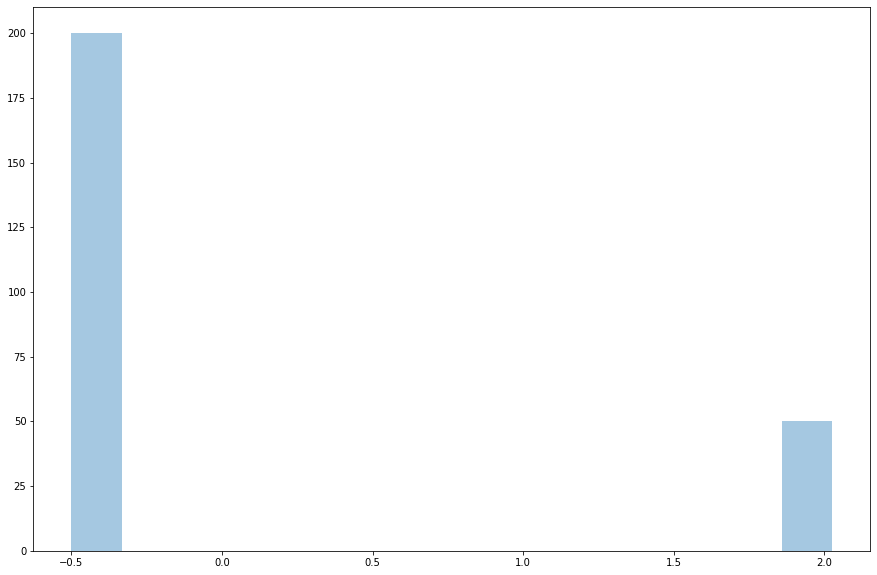

In [75]:
continuous_var_distplot(x=pt.transform(X))

In [89]:
import numpy as np
from sklearn.preprocessing import QuantileTransformer
X = df[['n_reviews']]
qt = preprocessing.QuantileTransformer(random_state=0)
qt.fit(X)

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\sklearn\preprocessing\_data.py:2370: UserWarning: n_quantiles (1000) is greater than the total number of samples (250). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


QuantileTransformer(random_state=0)

In [76]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

rng = np.random.RandomState(304)
# n_quantiles is set to the training set size rather than the default value
# to avoid a warning being raised by this example
qt = QuantileTransformer(n_quantiles=250, output_distribution='normal',
                         random_state=rng)

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


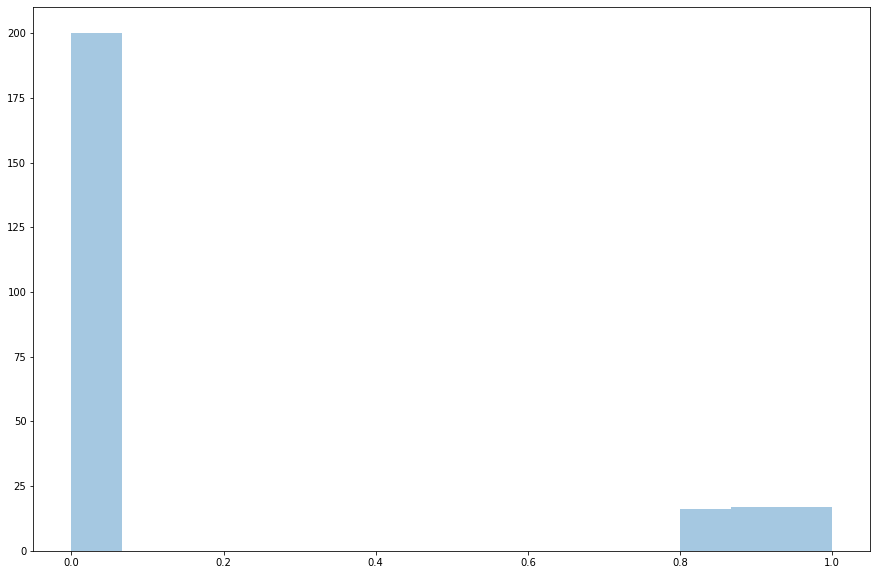

In [91]:
continuous_var_distplot(x=qt.transform(X))

In [92]:
df['n_reviews'] = qt.transform(X)

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [93]:
df

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,collaboration,description,difficulty,duration,free,id_course,n_reviews,rating,skills,title,url,time_range,difficulty_Career Advancement,difficulty_School of Artificial Intelligence,difficulty_School of Autonomous Systems,difficulty_School of Business,difficulty_School of Cloud Computing,difficulty_School of Data Science,difficulty_School of Programming & Development
0,Insight,"Learn to design data models, build data wareho...",2.0,2.156885,0,nd027,0.967871,0.574993,"Data Modeling, Data Pipelines, Data Lakes, Spa...",Become a Data Engineer,https://www.udacity.com/course/data-engineer-n...,months,0,0,0,0,0,1,0
1,"Google, Hootsuite, HubSpot, MailChimp, Moz, Fa...","Learn to create marketing content, use social ...",1.0,0.789128,0,nd018,0.983936,0.788154,"Digital Marketing, Social Media Marketing, Fac...",Become a Digital Marketer,https://www.udacity.com/course/digital-marketi...,months,0,0,0,1,0,0,0
2,None,You’ll learn how to create a digital user expe...,1.0,0.789128,0,nd578,0.935743,0.809220,"User Research, User Experience, Prototyping, I...",Become a UX Designer,https://www.udacity.com/course/ux-designer-nan...,months,0,0,0,1,0,0,0
3,"AWS, Facebook Artificial Intelligence","Become an expert in neural networks, and learn...",2.0,1.473007,0,nd101,0.991968,0.732811,"Deep Learning, Neural Networks, Jupyter Notebo...",Deep Learning,https://www.udacity.com/course/deep-learning-n...,months,0,1,0,0,0,0,0
4,None,The goal of the Full Stack Web Developer Nanod...,2.0,1.473007,0,nd0044,0.915663,0.558763,"Python, JavaScript, PostgreSQL, Flask, Docker,...",Full Stack Web Developer,https://www.udacity.com/course/full-stack-web-...,months,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,"Kaggle, AWS",Learn foundational machine learning algorithms...,2.0,0.789128,0,nd229,0.879518,0.854073,"Introduction to Machine Learning, Supervised L...",Intro to Machine Learning with PyTorch,https://www.udacity.com/course/intro-to-machin...,months,0,1,0,0,0,0,0
246,None,Build sustainable profit streams from products...,2.0,-0.578630,0,nd037-3,0.000000,NaN,"Product Management, Monetization Models, Prici...",Monetization Strategy Course,https://www.udacity.com/course/monetization-st...,month,0,0,0,1,0,0,0
247,WorldQuant,"Learn the basics of quantitative analysis, inc...",2.0,2.840764,0,nd880,0.911647,0.613715,"Momentum Trading Strategy, Smart Beta, Alpha F...",Artificial Intelligence for Trading,https://www.udacity.com/course/ai-for-trading-...,months,0,1,0,0,0,0,0
248,None,Learn the essential foundations of AI: the pro...,1.0,0.789128,0,nd089,0.963855,0.677144,"Python, NumPy, Pandas, Matplotlib, PyTorch",AI Programming with Python,https://www.udacity.com/course/ai-programming-...,months,0,1,0,0,0,0,0


In [25]:
df.to_csv('output_feature_engenieering.csv')